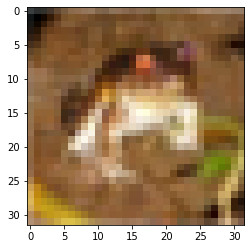

In [31]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape
X_test.shape

#to check each of the training samples
X_train[0]#gives a 3d array, 32*32*3
#to view how the images look like
plt.imshow(X_train[0])

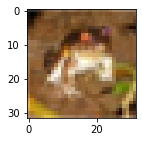

In [32]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])

In [33]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [34]:
#we realize y train is given as 2d array
y_train[:5]
#we need to reshape it to a single array as it only contains image numbers


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [35]:
#we need to reshape it to a single array and flatten it as it only contains image numbers
y_train =  y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [36]:
#we can write a function to load the images
def plot_sample(X,y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

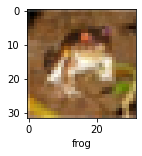

In [37]:
#now we call the aboe function and plot the images
plot_sample(X_train, y_train,0)

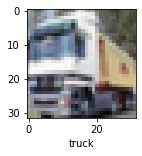

In [38]:
plot_sample(X_train, y_train,1)

In [39]:
#next we normalize/scale our data between 0 and 1. We can ahieve that by diving each image number by 255 
#because pixels lies in range of 1 to 255
X_train =  X_train/255
X_test = X_test/255

In [40]:
#we first begin by building a simple artificial neural network(ANN) to train the model
ann=  models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation ='relu'),
    layers.Dense(1000, activation ='relu'),
    layers.Dense(10, activation ='sigmoid'),
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.8118 - accuracy: 0.3563
Epoch 2/5
1563/1563 [==============================] - 112s 71ms/step - loss: 1.6231 - accuracy: 0.4271
Epoch 3/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.5422 - accuracy: 0.4575
Epoch 4/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.4826 - accuracy: 0.4784
Epoch 5/5
1563/1563 [==============================] - 110s 70ms/step - loss: 1.4318 - accuracy: 0.4967


In [42]:
#we can also print the classification report
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('Classification Report: \n', classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.32      0.76      0.45      1000
           1       0.60      0.57      0.59      1000
           2       0.43      0.31      0.36      1000
           3       0.41      0.25      0.31      1000
           4       0.44      0.40      0.42      1000
           5       0.57      0.17      0.27      1000
           6       0.49      0.60      0.54      1000
           7       0.54      0.55      0.54      1000
           8       0.52      0.59      0.56      1000
           9       0.59      0.46      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



In [43]:
#we can now use the CNN to improve the performance of this model
cnn=  models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3),activation = 'relu',input_shape =(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation ='relu'),
    layers.Dense(10, activation ='softmax'),
])

In [44]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 58s 36ms/step - loss: 1.4991 - accuracy: 0.4592
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1351 - accuracy: 0.6033
Epoch 3/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.0016 - accuracy: 0.6543
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9225 - accuracy: 0.6803
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8536 - accuracy: 0.7051
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7966 - accuracy: 0.7241
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7499 - accuracy: 0.7391
Epoch 8/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7022 - accuracy: 0.7568
Epoch 9/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6643 - accuracy: 0.7692
Epoch 10/10
1563/1563 [==============================] - 55s 35m

In [45]:
#we can ealuate this model
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 9s 22ms/step - loss: 0.8944 - accuracy: 0.7028


[0.894417405128479, 0.7027999758720398]

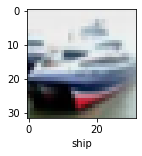

In [46]:
#we can now plot some samples
y_test = y_test.reshape(-1)
plot_sample(X_test,y_test,1)

In [47]:
#now lets use our model to predict this
y_pred = cnn.predict(X_test)
y_pred[:5]
#the values in each of this elements are a probability distribution in between 0 and 1. To find out which
#element is the max, we use argmax function

array([[4.3515200e-04, 1.3305755e-04, 1.7457866e-03, 7.8268564e-01,
        2.6745046e-04, 1.9630034e-01, 8.0448333e-03, 8.6481938e-05,
        1.0229975e-02, 7.1296556e-05],
       [4.4153057e-04, 8.7435190e-03, 2.0415044e-07, 7.0619350e-08,
        3.5374015e-09, 3.6916701e-09, 1.6565685e-09, 2.9044085e-09,
        9.9079937e-01, 1.5193776e-05],
       [1.5071350e-01, 3.1470078e-01, 2.3285661e-02, 6.5898057e-03,
        1.5655325e-03, 6.7279668e-04, 9.5741809e-05, 2.1985951e-03,
        4.8016238e-01, 2.0015148e-02],
       [7.3792881e-01, 5.9739719e-03, 2.0623328e-02, 9.0649095e-04,
        5.4508368e-03, 8.1904509e-05, 3.0276016e-04, 1.0137414e-03,
        2.2735530e-01, 3.6283056e-04],
       [1.7415449e-06, 1.5460370e-06, 1.0305401e-02, 6.1721347e-02,
        1.5070638e-01, 2.3428681e-03, 7.7488786e-01, 3.5390422e-06,
        2.7751688e-05, 1.6594230e-06]], dtype=float32)

In [51]:
y_classes  = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [50]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

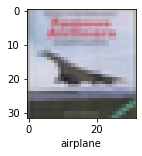

In [57]:
plot_sample(X_test,y_test,3)

In [58]:
classes[y_classes[3]]

'airplane'

In [54]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [59]:
#lastly we can print the classification report
print('Classification Report: \n', classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.79      0.74      1000
           1       0.81      0.84      0.83      1000
           2       0.60      0.59      0.59      1000
           3       0.53      0.55      0.54      1000
           4       0.69      0.60      0.64      1000
           5       0.66      0.55      0.60      1000
           6       0.69      0.84      0.75      1000
           7       0.78      0.72      0.74      1000
           8       0.76      0.83      0.80      1000
           9       0.83      0.73      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

